<a href="https://colab.research.google.com/github/Rpvermaak/BeanVoyage-Project/blob/main/BeanVoyage_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

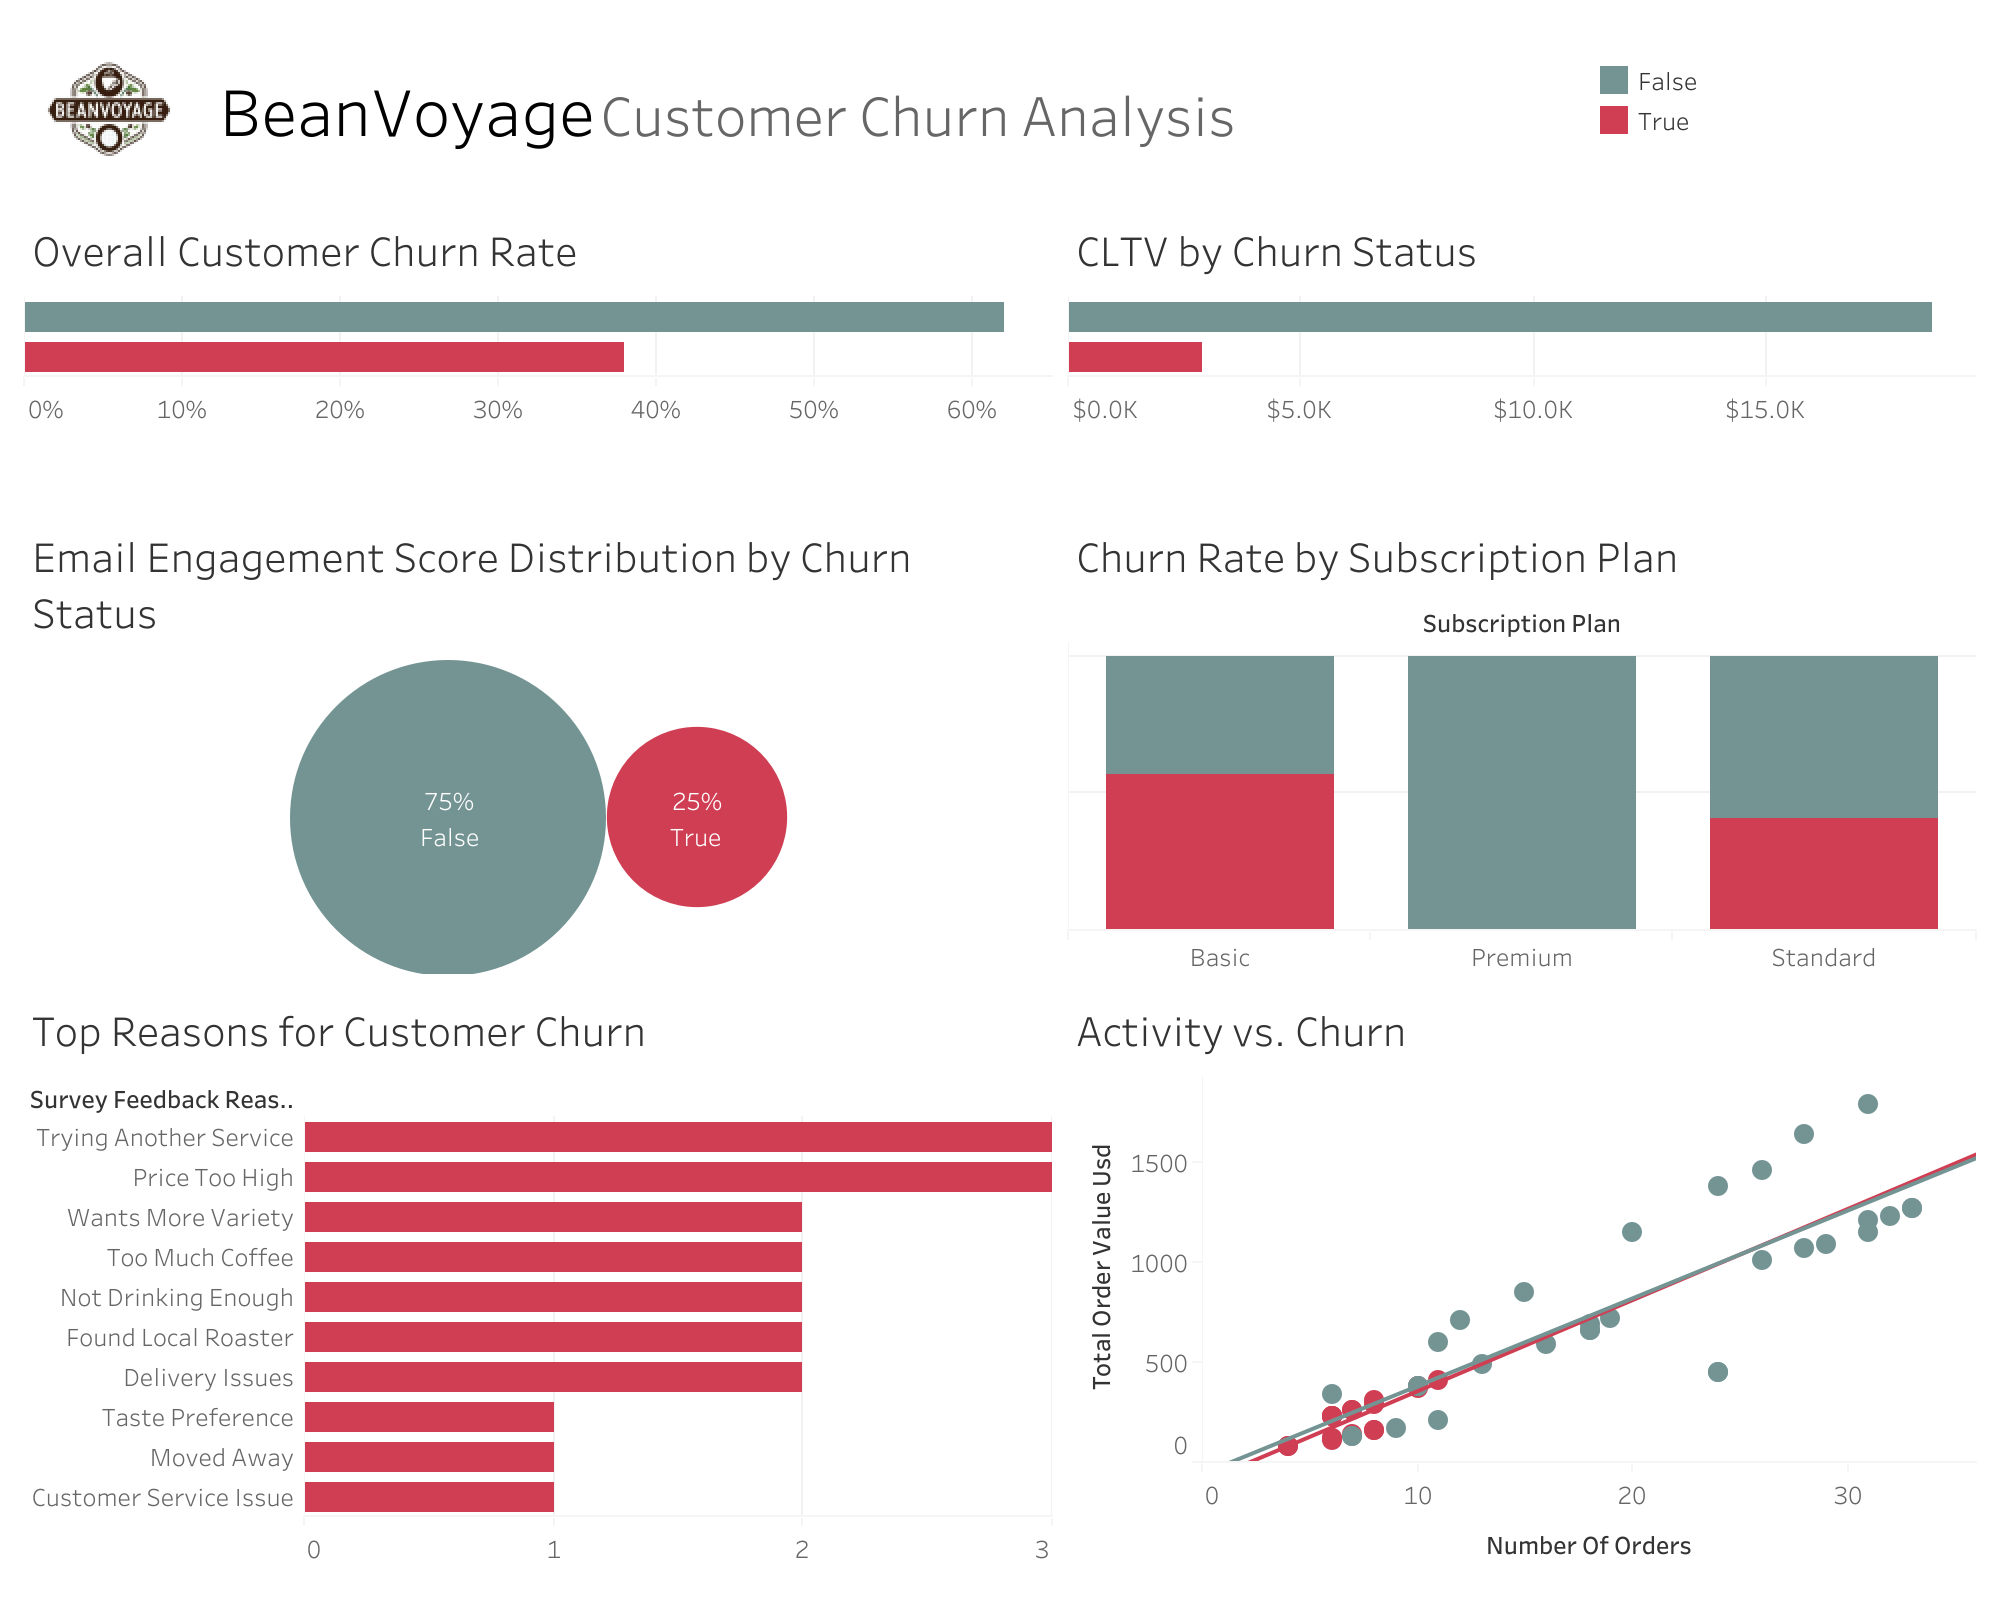

#BeanVoyage

This is a hypothetical project created to simulate a scenario where the customer in this case BeanVoyage asked a freelance data analyst to derive valuable insights from customer data.


### The Scenario: "BeanVoyage" Needs Clarity
My Problem: I've been running BeanVoyage for about two years. We've got a decent number of subscribers, and sales are generally good, but I feel like we're leaving money on the table. I also don't really understand why some customers churn (cancel their subscriptions) while others stay loyal for ages. I'm collecting data from my e-commerce platform (Shopify), my email marketing tool (Mailchimp), and my simple customer survey responses. It's all just sitting there, and I don't have the time or expertise to dig into it.

My Goal: I want to understand my customer base better, identify ways to improve customer retention, and find opportunities to increase average order value or subscription length.

### Key Deliverables I'd Be Looking For
Based on your presentation, here's what I'd want to receive for this practice project:

1. A Clear Report on Customer Churn:

* What I need: A summary of why customers might be cancelling. Can you identify any common patterns or characteristics among customers who churn versus those who stay? Are there specific points in their subscription journey where they're more likely to leave?
What it should look like: A concise report (maybe 2-3 pages) with a few easy-to-understand charts or graphs illustrating key findings. No jargon, please!

2. Actionable Recommendations for Retention:

* What I need: Based on your churn analysis, give me 2-3 specific, practical steps I can take right now to try and reduce customer cancellations.
What it should look like: A bulleted list within the report, very clear and direct.

3. Customer Segmentation Overview:

* What I need: A high-level overview of different customer types I might have. For example, "loyal long-termers," "trial-period testers," "infrequent purchasers," etc. This doesn't need to be super deep, just enough to give me a sense of who my different customers are.
What it should look like: A brief section in the report, perhaps with a simple diagram or table.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import and view customer data
path1 = "/content/drive/MyDrive/BeanVoyage Project/beanvoyage_customer_data - Customer Data.csv"

df_customer_data = pd.read_csv(path1)


df_customer_data.head()


,customer_id,join_date,subscription_plan,monthly_spend_usd,last_purchase_date,customer_lifetime_value_usd,email_engagement_score,churned,churn_date,survey_feedback_reason
0,BV001,2023-08-03,Premium,46.22,2024-05-18,415.98,5,False,NaN,NaN
1,BV002,2022-02-14,Standard,30.70,2024-05-27,840.48,4,False,NaN,NaN
2,BV003,2023-01-26,Standard,29.89,2024-05-23,508.13,4,False,NaN,NaN
3,BV004,2023-07-28,Premium,45.31,2024-05-24,453.10,5,False,NaN,NaN
4,BV005,2022-09-24,Basic,21.05,2023-01-09,84.20,2,True,2023-01-19,Not Drinking Enough


In [4]:
# Import and view subcription data

path2 = "/content/drive/MyDrive/BeanVoyage Project/beanvoyage_subscription_order_data - Subscription Order Data.csv"

df_subscription_data = pd.read_csv(path2)

df_subscription_data.head()


,order_id,customer_id,order_date,product_type,item_count,order_value_usd
0,O10001,BV001,2023-08-03,Single Origin,3,60
1,O10002,BV001,2023-08-30,Blend,3,45
2,O10003,BV001,2023-09-28,Decaf,3,54
3,O10004,BV001,2023-10-25,Single Origin,3,60
4,O10005,BV001,2023-11-20,Blend,3,45


# Exploratory Data Analysis

In [5]:
df_customer_data.info()
df_subscription_data.isnull().sum()
df_subscription_data.isnull().sum()/len(df_subscription_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_id                  50 non-null     object 
 1   join_date                    50 non-null     object 
 2   subscription_plan            50 non-null     object 
 3   monthly_spend_usd            50 non-null     float64
 4   last_purchase_date           50 non-null     object 
 5   customer_lifetime_value_usd  50 non-null     float64
 6   email_engagement_score       50 non-null     int64  
 7   churned                      50 non-null     bool   
 8   churn_date                   19 non-null     object 
 9   survey_feedback_reason       19 non-null     object 
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 3.7+ KB


,0
order_id,0.0
customer_id,0.0
order_date,0.0
product_type,0.0
item_count,0.0
order_value_usd,0.0


The customer data sample contains 50 entries. The dataset provides mostly informational data like the customer ID, join date and subscription plan. It also contains data about the amount customers spend and how much they have spent throughout the customer lifetime. This data frame also includes boolean values about customer churn, this data will be important in this analysis.

This dataset contains no null values.

In [6]:
df_subscription_data.info()
df_subscription_data.isnull().sum()/len(df_subscription_data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   order_id         754 non-null    object
 1   customer_id      754 non-null    object
 2   order_date       754 non-null    object
 3   product_type     754 non-null    object
 4   item_count       754 non-null    int64 
 5   order_value_usd  754 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 35.5+ KB


,0
order_id,0.0
customer_id,0.0
order_date,0.0
product_type,0.0
item_count,0.0
order_value_usd,0.0


The subscription dataset contains 754 entries. This dataset shows the purchase information of the customers.

This dataset contains no null values.

### Descriptive statistics

In [7]:
df_customer_data.describe()

,monthly_spend_usd,customer_lifetime_value_usd,email_engagement_score
count,50.000000,50.000000,50.000000
mean,30.233200,429.152400,3.420000
std,8.637393,333.219031,1.230397
min,18.230000,77.360000,1.000000
25%,21.012500,150.325000,2.250000
50%,30.335000,278.730000,3.500000
75%,31.470000,701.977500,4.000000
max,46.990000,1130.000000,5.000000


This result provides an overview of the numeric data in the data set to better understand the main futures.

In [8]:
df_subscription_data.describe()

,item_count,order_value_usd
count,754.000000,754.000000
mean,2.055703,39.057029
std,0.632939,14.271069
min,1.000000,15.000000
25%,2.000000,30.000000
50%,2.000000,40.000000
75%,2.000000,50.000000
max,3.000000,75.000000


# Merge the two dataset

In [9]:
# merge the two dataset
# the 'customer_id" column connects the two datasets

print(df_customer_data.columns)
print(df_subscription_data.columns)

Index(['customer_id', 'join_date', 'subscription_plan', 'monthly_spend_usd',
       'last_purchase_date', 'customer_lifetime_value_usd',
       'email_engagement_score', 'churned', 'churn_date',
       'survey_feedback_reason'],
      dtype='object')
Index(['order_id', 'customer_id', 'order_date', 'product_type', 'item_count',
       'order_value_usd'],
      dtype='object')


In [10]:

# Group by 'customer_id' and calculate summaries
customer_subscription_summary = df_subscription_data.groupby('customer_id').agg(
    # Corrected column name: 'item_count' instead of 'items'
    avg_items_per_order=('item_count', 'mean'),
    total_items_purchased=('item_count', 'sum'), # Using sum for total items purchased

    # Add other aggregations as desired, e.g., for 'order_value_usd'
    total_order_value_usd=('order_value_usd', 'sum'),
    number_of_orders=('order_id', 'count'), # Assuming order_id is unique per order
    avg_order_value_per_order=('order_value_usd', 'mean')

).reset_index() # Important: This turns 'customer_id' back into a regular column

print("\nAggregated Subscription Data (customer_subscription_summary) Info:")
print(customer_subscription_summary.info()) # Use info() to see the new column names and types
print("\nAggregated Subscription Data Head:")
print(customer_subscription_summary.head())
print(f"Shape: {customer_subscription_summary.shape}")

# --- Step 2: Combine with df_customer_data (from previous instructions) ---
# Assuming df_customer_data also has 'customer_id'
final_customer_df = pd.merge(
    df_customer_data,
    customer_subscription_summary,
    on='customer_id',
    how='left'
)

print("\n--- Final Customer-Level DataFrame (final_customer_df) Info ---")
print(final_customer_df.info())
print("\n--- Final Customer-Level DataFrame Head ---")
print(final_customer_df.head())
print("\n--- Check for any missing values after merge ---")
print(final_customer_df.isnull().sum())


Aggregated Subscription Data (customer_subscription_summary) Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                50 non-null     object 
 1   avg_items_per_order        50 non-null     float64
 2   total_items_purchased      50 non-null     int64  
 3   total_order_value_usd      50 non-null     int64  
 4   number_of_orders           50 non-null     int64  
 5   avg_order_value_per_order  50 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 2.5+ KB
None

Aggregated Subscription Data Head:
  customer_id  avg_items_per_order  total_items_purchased  \
0       BV001                  3.0                     33   
1       BV002                  2.0                     62   
2       BV003                  2.0                     36   
3       BV004                  3.0 

In [11]:
# Confirm the structure and data types:
final_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_id                  50 non-null     object 
 1   join_date                    50 non-null     object 
 2   subscription_plan            50 non-null     object 
 3   monthly_spend_usd            50 non-null     float64
 4   last_purchase_date           50 non-null     object 
 5   customer_lifetime_value_usd  50 non-null     float64
 6   email_engagement_score       50 non-null     int64  
 7   churned                      50 non-null     bool   
 8   churn_date                   19 non-null     object 
 9   survey_feedback_reason       19 non-null     object 
 10  avg_items_per_order          50 non-null     float64
 11  total_items_purchased        50 non-null     int64  
 12  total_order_value_usd        50 non-null     int64  
 13  number_of_orders      

A new data frame was created by summarizing the data from the `df_subscription_data` and then merging it with the data from `df_customer_data`. This new dataset will be used for deeper analysis.

In [12]:
final_customer_df.sample(5)

,customer_id,join_date,subscription_plan,monthly_spend_usd,last_purchase_date,customer_lifetime_value_usd,email_engagement_score,churned,churn_date,survey_feedback_reason,avg_items_per_order,total_items_purchased,total_order_value_usd,number_of_orders,avg_order_value_per_order
26,BV027,2023-12-19,Premium,46.99,2024-05-15,234.95,5,False,NaN,NaN,3.0,18,339,6,56.500000
9,BV010,2022-04-20,Standard,31.53,2024-05-25,819.78,5,False,NaN,NaN,2.0,58,1090,29,37.586207
33,BV034,2023-01-09,Basic,19.99,2023-07-01,119.94,1,True,2023-07-15,Too Much Coffee,1.0,7,138,7,19.714286
34,BV035,2023-09-05,Standard,30.65,2024-05-24,275.85,4,False,NaN,NaN,2.0,20,382,10,38.200000
48,BV049,2023-01-20,Standard,28.84,2023-06-25,144.20,3,True,2023-07-05,Moved Away,2.0,12,226,6,37.666667


## Handle missing values

It is important to revisit and affirm that aggregated columns (e.g., avg_items_per_order, total_order_value_usd) have `NaN`s, meaning those customers had no records in the original `df_subscribe_data.


For these specific aggregated columns, `NaN` often logically means "zero activity.".So imputing with `0`(zero) is usually the correct approach for these.

In [13]:
# Impute tNan values in newly aggregated columns with 0
columns_to_impute_with_zero = [
    'avg_items_per_order',
    'total_order_value_usd',
    'number_of_orders',
    'avg_order_value_per_order'
    'min_order_value', # If customer had no orders, min/max would be NaN
    'max_order_value',
]

for col in columns_to_impute_with_zero:
  if col in final_customer_df.columns:
    final_customer_df[col]= final_customer_df[col].fillna(0)

# Re_check for other missing values, e.g., churn_date, survey_feedback_reason
# For 'churn_date' and 'survey_feedback_reason' NaNs are meaningful (no chrun, no feedback)

print("\nMissing values after imputation:")
print(final_customer_df.isnull().sum())


Missing values after imputation:
customer_id                     0
join_date                       0
subscription_plan               0
monthly_spend_usd               0
last_purchase_date              0
customer_lifetime_value_usd     0
email_engagement_score          0
churned                         0
churn_date                     31
survey_feedback_reason         31
avg_items_per_order             0
total_items_purchased           0
total_order_value_usd           0
number_of_orders                0
avg_order_value_per_order       0
dtype: int64


## Descriptive statistics for all Numerical Features:




In [14]:
final_customer_df.describe()

,monthly_spend_usd,customer_lifetime_value_usd,email_engagement_score,avg_items_per_order,total_items_purchased,total_order_value_usd,number_of_orders,avg_order_value_per_order
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,30.233200,429.152400,3.420000,1.900000,31.000000,588.980000,15.080000,36.034163
std,8.637393,333.219031,1.230397,0.677631,24.462383,468.558427,9.471418,12.825303
min,18.230000,77.360000,1.000000,1.000000,4.000000,78.000000,4.000000,18.444444
25%,21.012500,150.325000,2.250000,1.000000,12.000000,226.000000,7.000000,19.910714
50%,30.335000,278.730000,3.500000,2.000000,21.000000,397.000000,11.000000,37.626437
75%,31.470000,701.977500,4.000000,2.000000,50.250000,967.500000,24.000000,38.411932
max,46.990000,1130.000000,5.000000,3.000000,93.000000,1788.000000,33.000000,59.000000


The table above provides statistics for all the original numeric features and the newly aggregated ones. This provides a quick overview of the central tendency, spread, and potential skewness.

## Comprehensive Visualizations (Histograms & Box Plots for all numeric features)

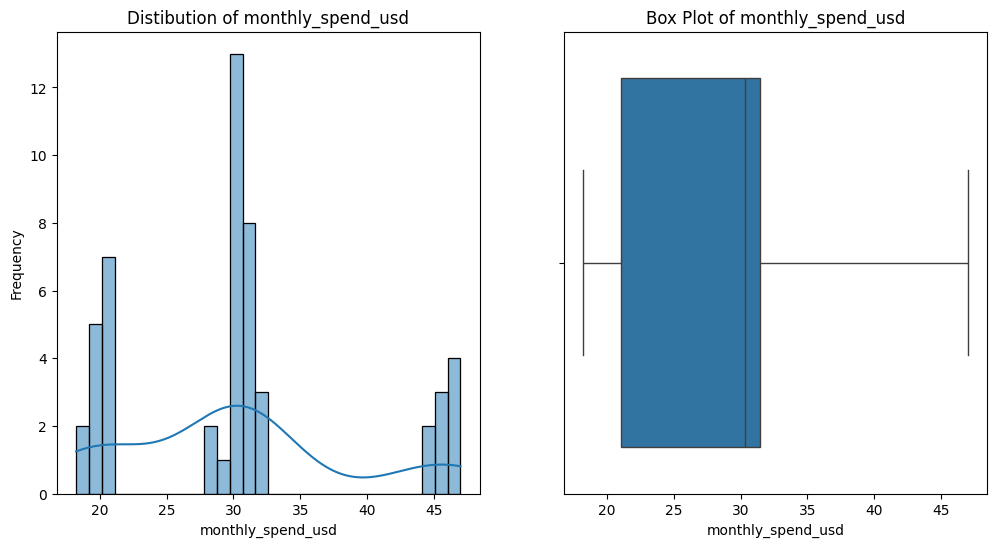

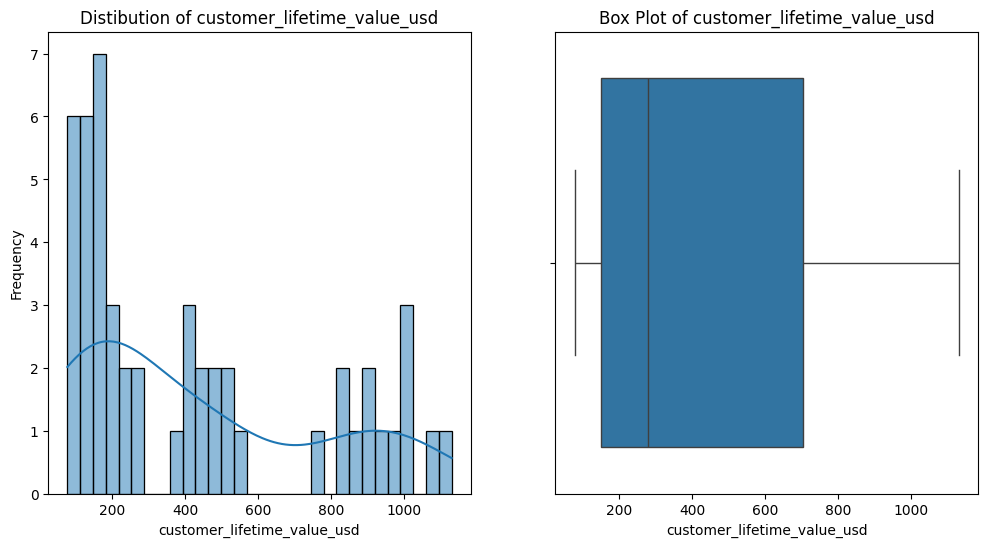

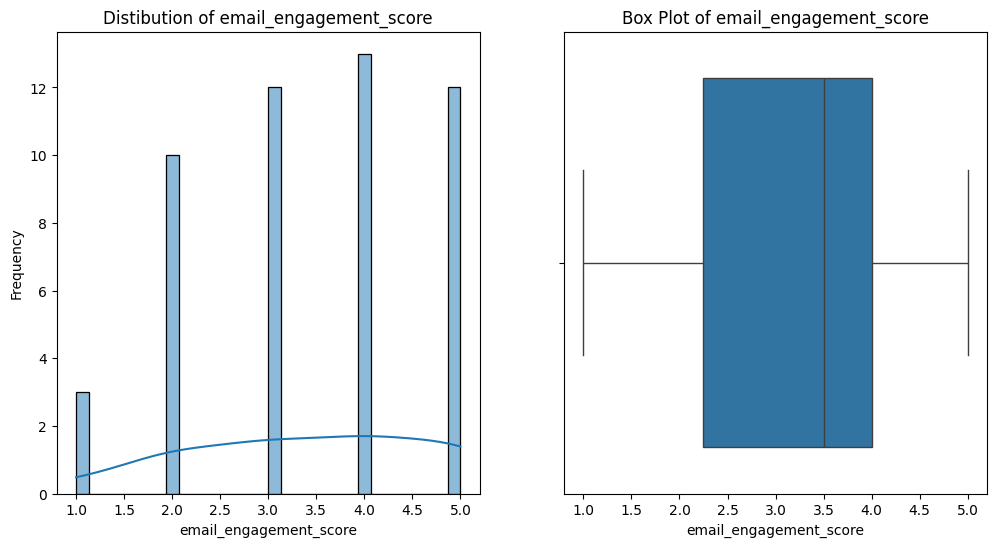

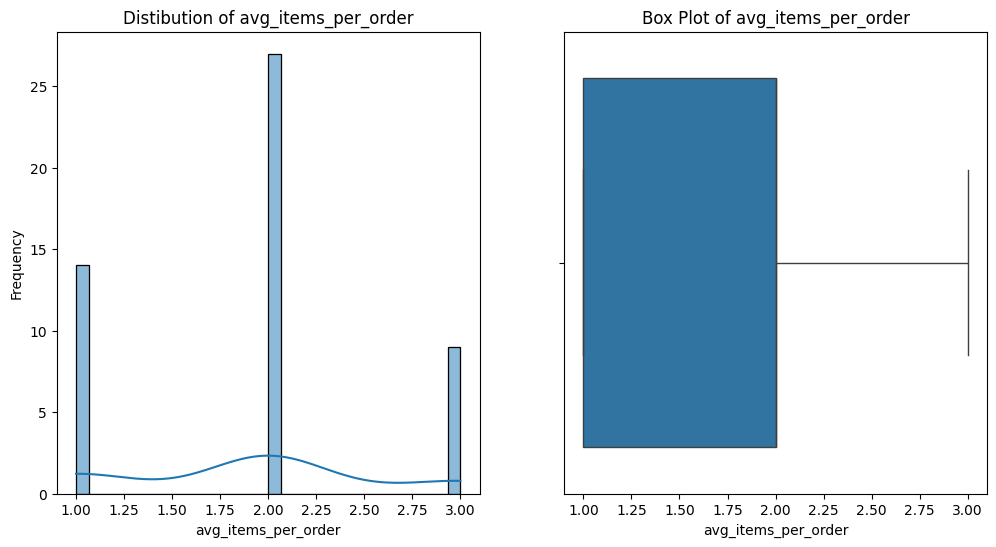

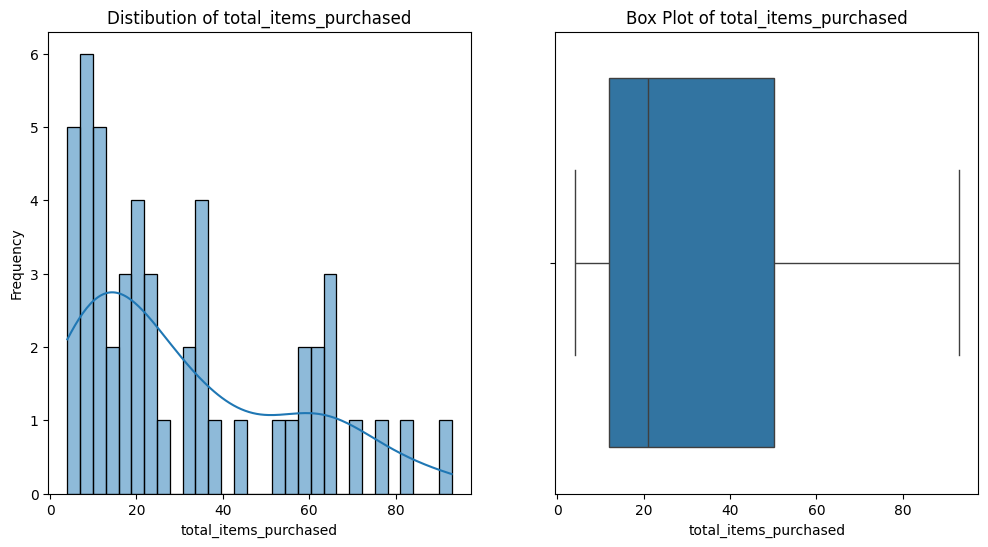

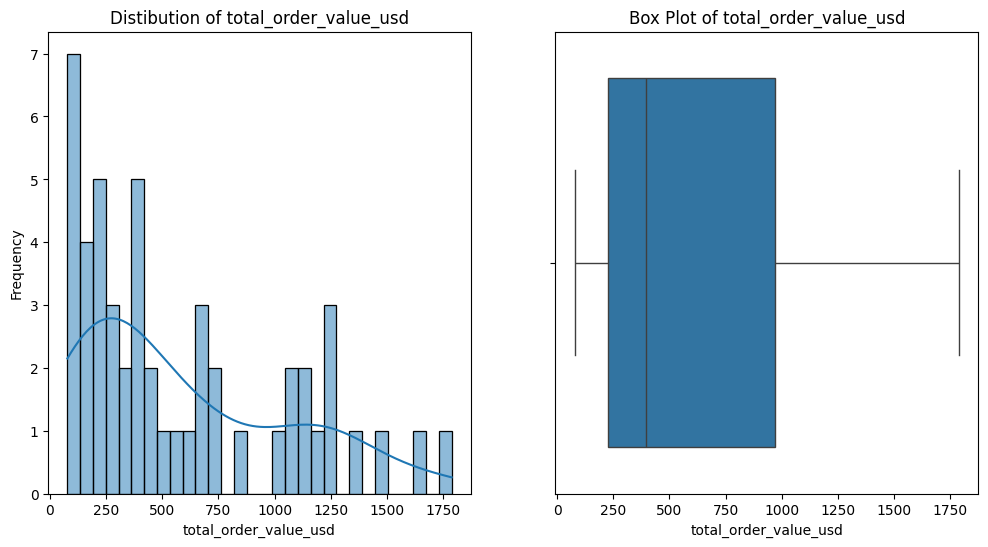

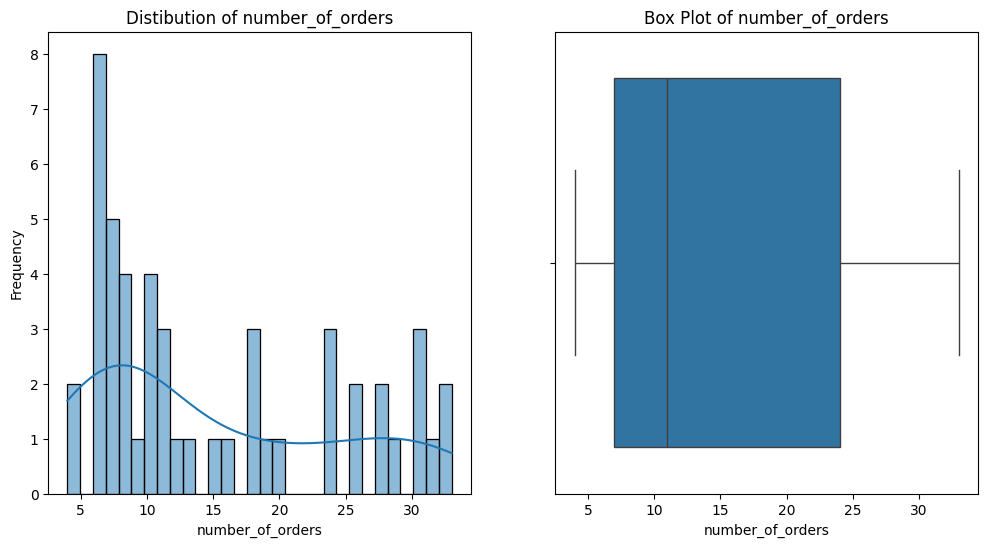

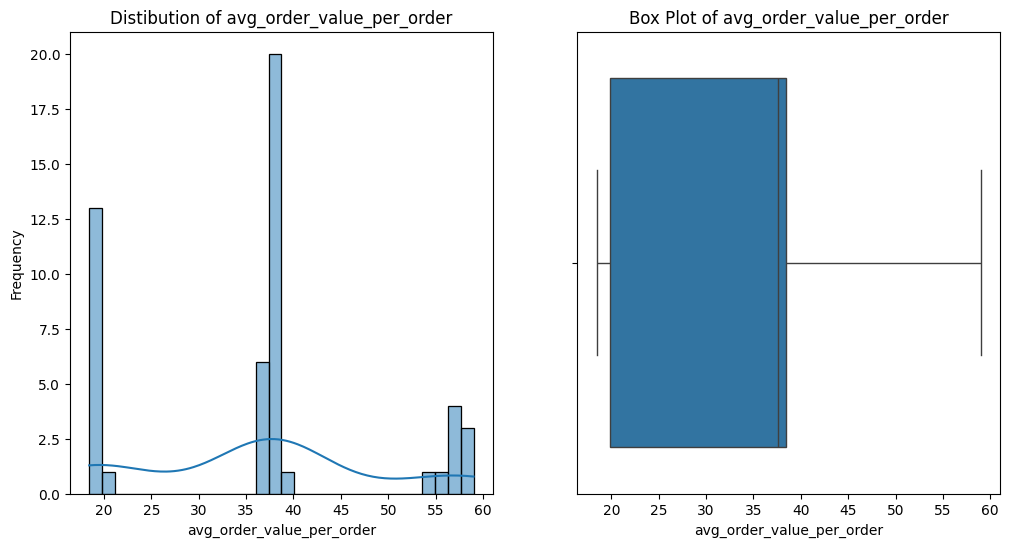

In [15]:
numerical_col = final_customer_df.select_dtypes(include=['number']).columns.tolist()


for col in numerical_col:
  plt.figure(figsize=(12,6))

  # Histogram with KDE
  plt.subplot(1,2,1)
  sns.histplot(final_customer_df[col], kde=True, bins=30)
  plt.title(f'Distibution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')

  # Box plot
  plt.subplot(1,2,2)
  sns.boxplot(x=final_customer_df[col])
  plt.title(f'Box Plot of {col}')
  plt.xlabel(col)

  plt.tight_layout
  plt.show()

# Explore Categorical Features & Their Relationships with Churn

## Identify Categorical Columns:

1. These are columns with object or category dtypes `(e.g., subscription_plan, product_type` if aggregated `churned` if it's 'Yes'/'No' string, `survey_feedback_reson`).

2. Ensure `churned` columns are in a usable format(`True`/`False` boolean or `0`/`1` integer).

In [16]:
# Identify categorical columns
# Include 'object', 'category', and 'bool' dtypes
categorical_cols = final_customer_df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print("Identified Categorical Columns:")
print(categorical_cols)

# Remove 'customer_id' and date columns from this list as they are not
# typically treated as categorical features for this type of analysis.
# Handle 'churned' separately for its critical role.
cols_to_remove = ['customer_id', 'join_date', 'churn_date']
categorical_for_analysis = [col for col in categorical_cols if col not in cols_to_remove]

print("\nCategorical Columns for Analysis:")
print(categorical_for_analysis)



Identified Categorical Columns:
['customer_id', 'join_date', 'subscription_plan', 'last_purchase_date', 'churned', 'churn_date', 'survey_feedback_reason']

Categorical Columns for Analysis:
['subscription_plan', 'last_purchase_date', 'churned', 'survey_feedback_reason']


## Ensure `churned` Column is Usable

The `merged_df.info()` output showed `churned` as `bool` dtype. This means it it's already in a `True/False` format, which `seaborn` plotting functions can directly interpret for grouping, or which can be easily mapped to `1`/`0` if needed  for correlation or modeling.

In [17]:
# Since the 'churned' column is already 'bool', this step might not be necessary,
# but it's good to keep in mind for future projects or of data types change.

print(f"\n'churned' column dtype: {final_customer_df['churned'].dtype}")


'churned' column dtype: bool


This Verifies that the 'churned' column accurately represents whether a customer churned (True/1) or nor (False/0).

## Value Counts & Bar Charts For Categorical Features

The following steps will help to understand the composition of the customer base across different categories. It will show you how many customers fall into each `subscription_plan`, what `product_type` is most popular.


--- Value Counts and Bar Charts for Categorical Features ---
'nValue counts for 'subscription_plan':
subscription_plan
Standard    27
Basic       14
Premium      9
Name: count, dtype: int64
Percentage of each category in 'subscription_plan':
subscription_plan
Standard    54.0
Basic       28.0
Premium     18.0
Name: proportion, dtype: float64


/tmp/ipython-input-18-3628033392.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=final_customer_df[col], order=final_customer_df[col].value_counts().index, palette='viridis')


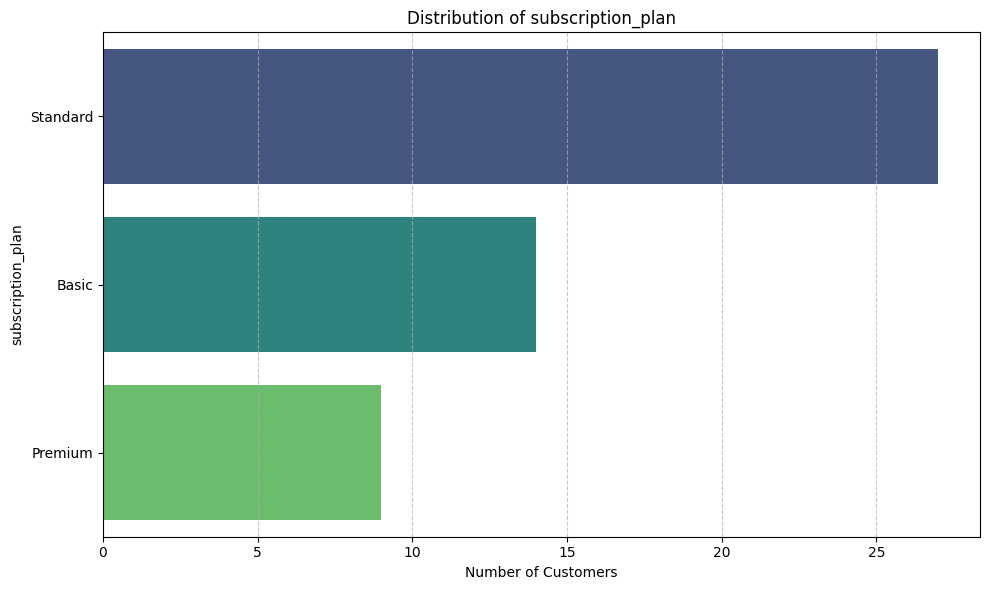

'nValue counts for 'last_purchase_date':
last_purchase_date
2024-05-18    5
2024-05-27    5
2024-05-24    3
2023-01-09    3
2023-01-10    3
2024-05-22    2
2024-05-16    2
2023-01-15    2
2023-06-25    2
2024-05-28    2
2024-05-20    2
2024-05-15    2
2024-05-23    1
2023-09-26    1
2023-02-10    1
2023-01-13    1
2024-05-25    1
2024-05-21    1
2024-05-26    1
2023-02-14    1
2024-05-11    1
2024-05-19    1
2023-11-10    1
2024-05-13    1
2023-07-01    1
2023-09-08    1
2024-05-12    1
2024-04-18    1
2023-01-12    1
Name: count, dtype: int64
Percentage of each category in 'last_purchase_date':
last_purchase_date
2024-05-18    10.0
2024-05-27    10.0
2024-05-24     6.0
2023-01-09     6.0
2023-01-10     6.0
2024-05-22     4.0
2024-05-16     4.0
2023-01-15     4.0
2023-06-25     4.0
2024-05-28     4.0
2024-05-20     4.0
2024-05-15     4.0
2024-05-23     2.0
2023-09-26     2.0
2023-02-10     2.0
2023-01-13     2.0
2024-05-25     2.0
2024-05-21     2.0
2024-05-26     2.0
2023-02-14     2.

/tmp/ipython-input-18-3628033392.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=final_customer_df[col], order=final_customer_df[col].value_counts().index, palette='viridis')


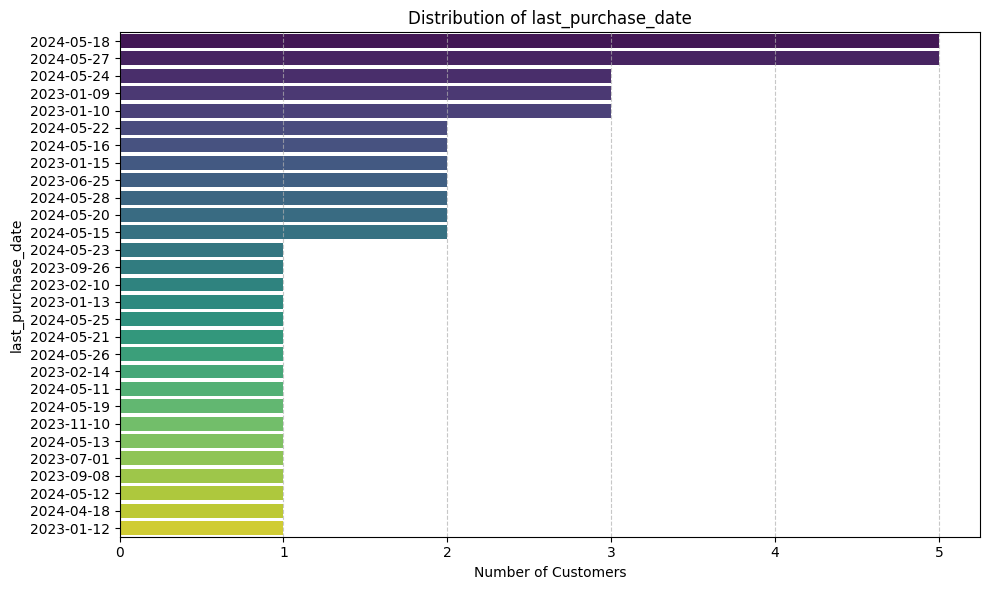

'nValue counts for 'churned':
churned
False    31
True     19
Name: count, dtype: int64
Percentage of each category in 'churned':
churned
False    62.0
True     38.0
Name: proportion, dtype: float64


/tmp/ipython-input-18-3628033392.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=final_customer_df[col], order=final_customer_df[col].value_counts().index, palette='viridis')


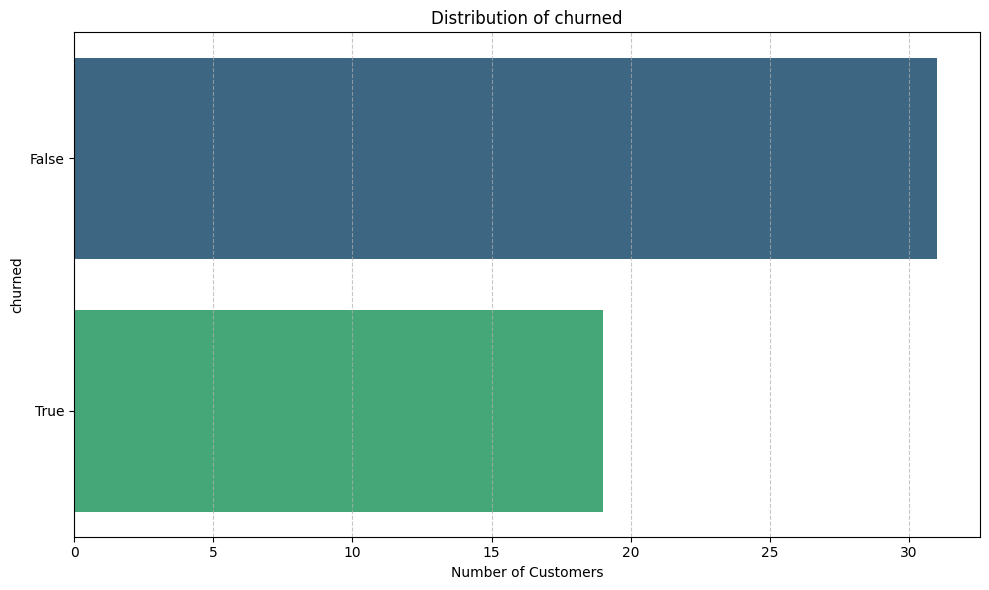

'nValue counts for 'survey_feedback_reason':
survey_feedback_reason
Price Too High            3
Trying Another Service    3
Not Drinking Enough       2
Delivery Issues           2
Too Much Coffee           2
Wants More Variety        2
Found Local Roaster       2
Customer Service Issue    1
Taste Preference          1
Moved Away                1
Name: count, dtype: int64
Percentage of each category in 'survey_feedback_reason':
survey_feedback_reason
Price Too High            15.789474
Trying Another Service    15.789474
Not Drinking Enough       10.526316
Delivery Issues           10.526316
Too Much Coffee           10.526316
Wants More Variety        10.526316
Found Local Roaster       10.526316
Customer Service Issue     5.263158
Taste Preference           5.263158
Moved Away                 5.263158
Name: proportion, dtype: float64


/tmp/ipython-input-18-3628033392.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=final_customer_df[col], order=final_customer_df[col].value_counts().index, palette='viridis')


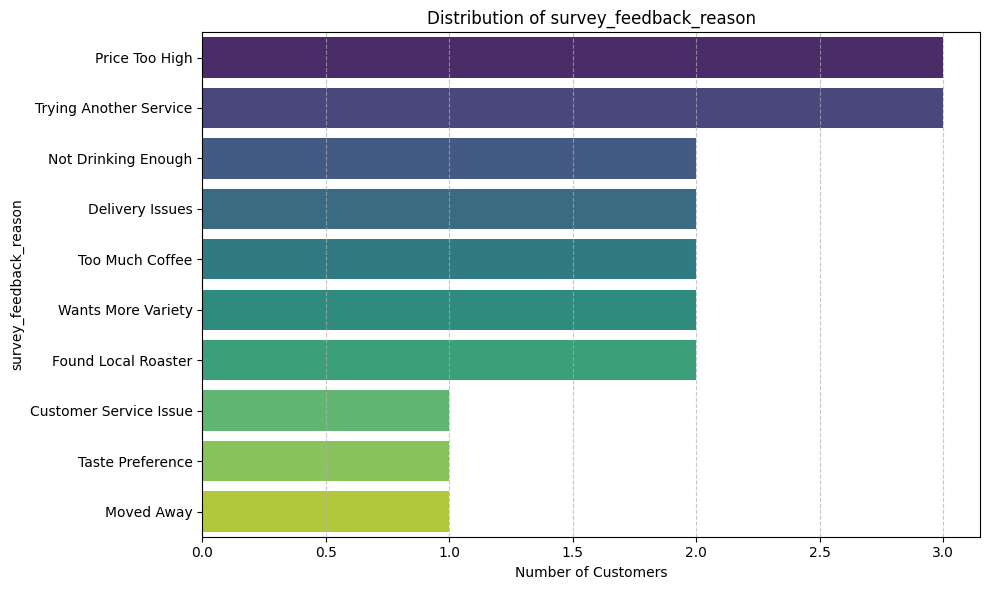

In [18]:
print("--- Value Counts and Bar Charts for Categorical Features ---")

for col in categorical_for_analysis:
  print(f"'nValue counts for '{col}':")
  # display raw counts
  print(final_customer_df[col].value_counts())
  # Display percentage for better comparison
  print(f"Percentage of each category in '{col}':")
  print(final_customer_df[col].value_counts(normalize=True)* 100)

  # Create a count plot (bar chart)
  plt.figure(figsize=(10,6))
  sns.countplot(y=final_customer_df[col], order=final_customer_df[col].value_counts().index, palette='viridis')
  plt.title(f'Distribution of {col}')
  plt.xlabel('Number of Customers')
  plt.ylabel(col)
  plt.grid(axis='x', linestyle='--', alpha=0.7)
  plt.tight_layout() # Adjust layout to prevent labels from overlapping
  plt.show()

After identifying value counts of churned customers it was calculated that about 38% of customers have churned.


The analysis then goes on to categorize the churned values into categories based on the reason the customer churned. The categories with the highest values are the `Price Too High` and `Trying Another Service`.


Other categories with few customers are `Customer Service Issue`, `Taste Preference` and `Moved Avay`. These categories might need to be grouped with other categories or handled specially if used for modeling, as too few samples can make analysis difficult.

## Bivariate Analysis: Categorical Features vs. Churn

This step is critical for identifying potential drivers of churn. Visualizing the churn rate within each category can help us understand these drivers.



--- Bivariate Analysis: Categorical Features vs. Churn ---


<Figure size 1000x600 with 0 Axes>

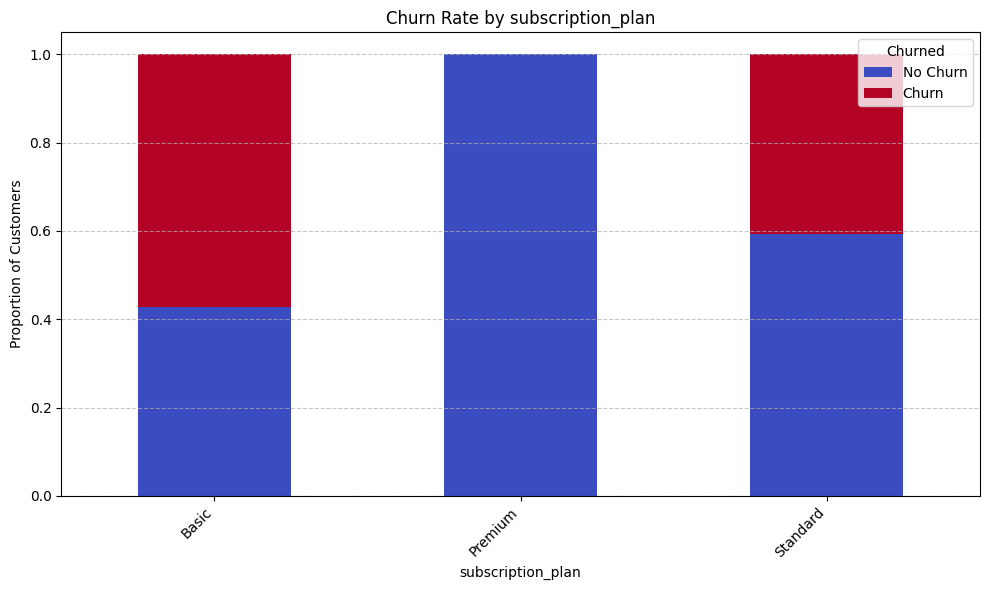


Churn Percentage for 'subscription_plan':
subscription_plan
Basic       57.142857
Standard    40.740741
Premium      0.000000
Name: True, dtype: float64


<Figure size 1000x600 with 0 Axes>

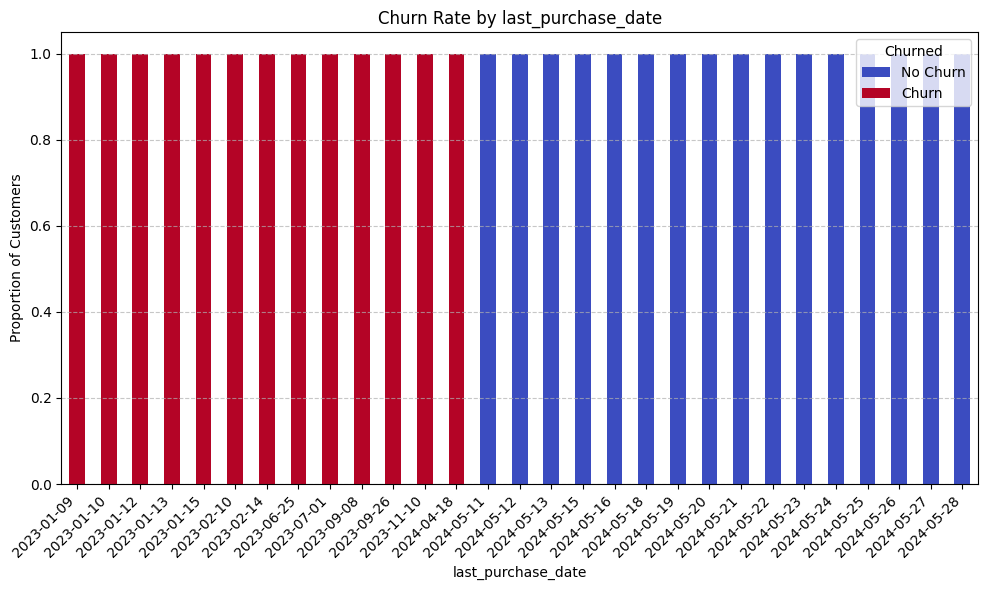


Churn Percentage for 'last_purchase_date':
last_purchase_date
2023-01-09    100.0
2023-01-10    100.0
2023-01-12    100.0
2023-01-13    100.0
2023-01-15    100.0
2023-02-10    100.0
2023-02-14    100.0
2023-06-25    100.0
2023-07-01    100.0
2023-09-08    100.0
2023-09-26    100.0
2023-11-10    100.0
2024-04-18    100.0
2024-05-11      0.0
2024-05-12      0.0
2024-05-13      0.0
2024-05-15      0.0
2024-05-16      0.0
2024-05-18      0.0
2024-05-19      0.0
2024-05-20      0.0
2024-05-21      0.0
2024-05-22      0.0
2024-05-23      0.0
2024-05-24      0.0
2024-05-25      0.0
2024-05-26      0.0
2024-05-27      0.0
2024-05-28      0.0
Name: True, dtype: float64


<Figure size 1000x600 with 0 Axes>

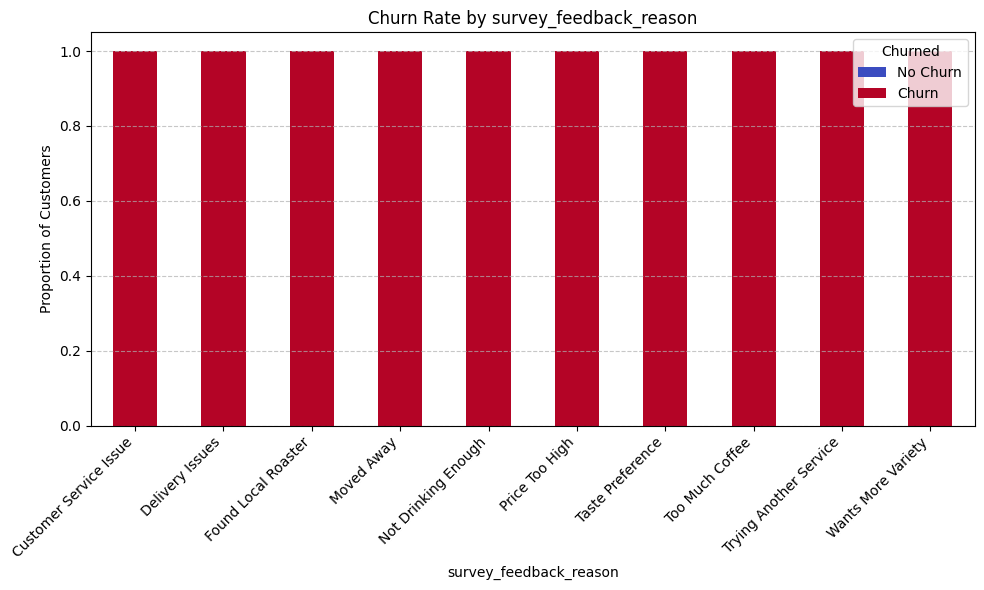


Churn Percentage for 'survey_feedback_reason':
survey_feedback_reason
Customer Service Issue    100.0
Delivery Issues           100.0
Found Local Roaster       100.0
Moved Away                100.0
Not Drinking Enough       100.0
Price Too High            100.0
Taste Preference          100.0
Too Much Coffee           100.0
Trying Another Service    100.0
Wants More Variety        100.0
Name: True, dtype: float64


In [19]:
print('\n--- Bivariate Analysis: Categorical Features vs. Churn ---')

for col in categorical_for_analysis:
    if col != 'churned': # Ensure we don't plot 'churned' against itself
        plt.figure(figsize=(10, 6))

        # Calculate the proportion of churned vs. non-churned for each category
        # .unstack() pivots the 'churned' levels into columns
        churn_proportion = final_customer_df.groupby(col)['churned'].value_counts(normalize=True).unstack()

        # Ensure only True/False columns are considered and NaN is handled.
        # Fill any NaN created by unstack() with 0.
        churn_proportion = churn_proportion.fillna(0)

        # Reindex to ensure 'False' and 'True' columns exist and are in correct order.
        # This will add missing columns with 0 and ensure order, preventing the ValueError.
        churn_proportion = churn_proportion.reindex(columns=[False, True], fill_value=0)


        # Create a stacked bar chart
        churn_proportion.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')

        plt.title(f'Churn Rate by {col}')
        plt.ylabel('Proportion of Customers')
        plt.xlabel(col)
        plt.xticks(rotation=45, ha='right') # Rotate labels for readability if they are long
        plt.legend(title='Churned', labels=['No Churn', 'Churn']) # Custom legend labels for clarity
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

        # Print the actual churn percentages for a quick numerical check
        print(f"\nChurn Percentage for '{col}':")
        # Selects the 'True' (churned) column and multiplies by 100 for percentage
        print((churn_proportion[True] * 100).sort_values(ascending=False))

When looking at the Bivariate plot a key insight that can be derived from these plots are that 57.14% of customers that churn had a basic subscription plan, 40.7% of customers had a standard subscription and there were no customers from the premium category that churned.

This might be worth investigating. If customers in a particular subscription plan or those who gave a specific survey feedback churn more often, this points to potential areas for BeanVoyage to address.

## Correlation Heatmap

In [20]:
numerical_cols_for_churn_analysis = final_customer_df.select_dtypes(include=['number']).columns.tolist()
# Add 'churned' if it's not already in and you want its correlations
if 'churned' not in numerical_cols_for_churn_analysis:
  numerical_cols_for_churn_analysis.append('churned')


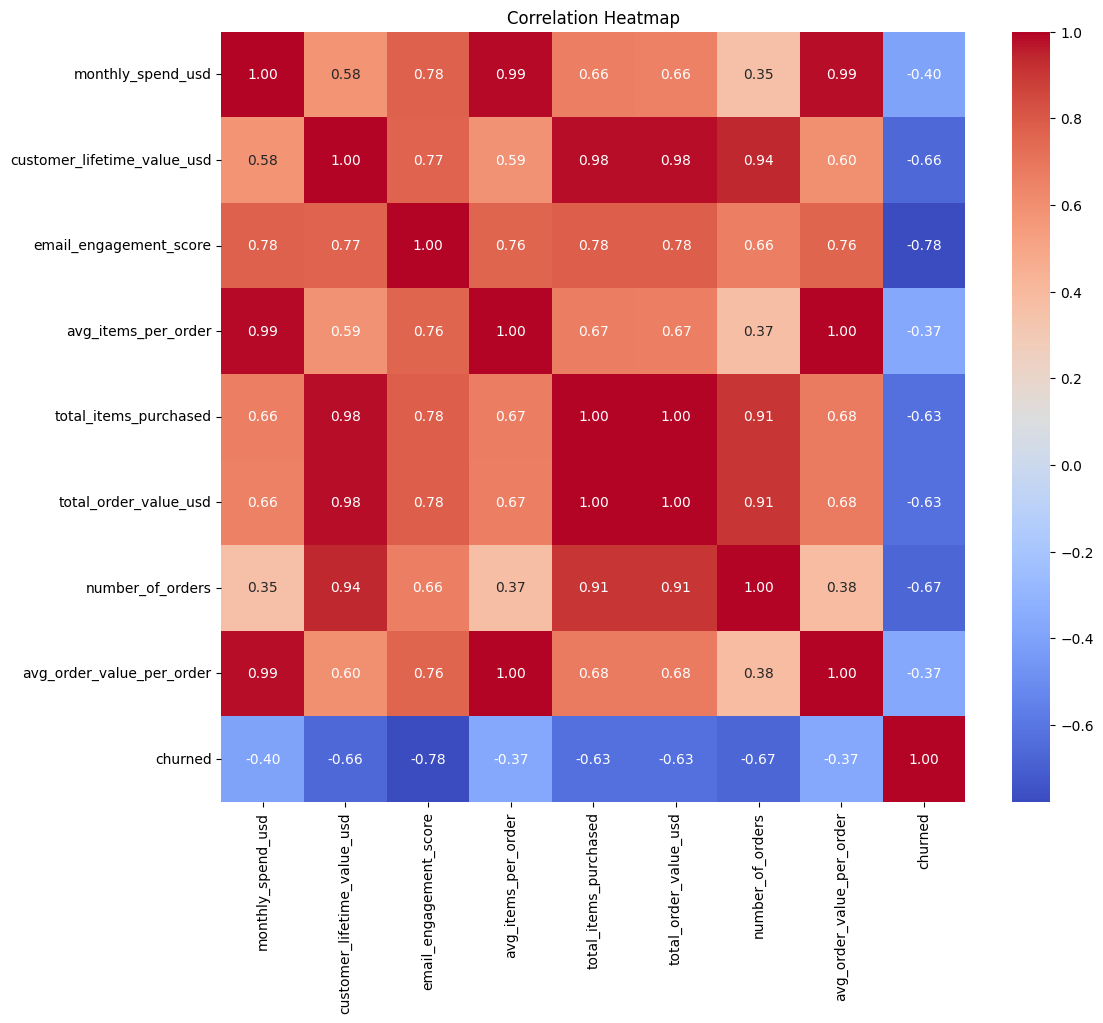

In [21]:
# Select only the numerical columns for correlation calculation
correlation_matrix = final_customer_df[numerical_cols_for_churn_analysis].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Summary of Insights for BeanVoyage

The heatmap provides strong evidence for several key factors influencing churn:

**Engagement is King:**  email_engagement_score has the strongest negative correlation with churn. This suggests that actively engaged customers are highly loyal.

**Value & Loyalty are Intertwined:** Higher customer_lifetime_value_usd, total_items_purchased, total_order_value_usd, and number_of_orders are all strongly associated with lower churn. These are different facets of customer loyalty and value.

**Consistency Matters:** monthly_spend_usd, avg_items_per_order, and avg_order_value_per_order also show moderate negative correlations. Customers with higher and more consistent spending/ordering patterns are less likely to churn.

### **Actionable Recommendations (Initial Thoughts from Heatmap):**


**Focus on Engagement:** BeanVoyage should prioritize strategies to boost email_engagement_score. What makes customers engage more? (e.g., personalized content, exclusive offers, helpful tips).

**Identify and Nurture High-Value/High-Activity Customers:** Your most valuable customers are your most loyal. Ensure they feel appreciated and continue to see value.

**Intervene Early for Low-Activity Customers:** Customers with low total orders, low CLTV, or low engagement are at much higher risk of churning. Implement strategies to re-engage them or understand their issues before they leave.



In [23]:
final_customer_df.to_csv('bean_voyage_customer_data.csv', index=False)